# **Méthode de Régression linéaire :**


# Sommaire :     

1.[Import des jeux de données](#Imports)

2.[Regression linéaire sur les émissions de CO2](#CV)

3.[Regression linéaire sur l'utilisation d'énergie](#hp)



<a name="Imports"></a>
## **Import des jeux de données** :





Régression linéaire :

Ce [modèle](https://www.ibm.com/fr-fr/analytics/learn/linear-regression#:~:text=L'analyse%20de%20r%C3%A9gression%20lin%C3%A9aire,variable%20est%20la%20variable%20ind%C3%A9pendante.) consiste à trouver une relation linéaire entre des variables pour faire des prédictions sur notre dataframe tout en ayant un coéfficient de détermination maximal (entre 0 et 1), et une marge d'erreur minimale.


In [1]:
from ast import literal_eval 

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

import statistics
import re
use_colab=True
if use_colab:
  from google.colab import drive
  drive.mount('/content/drive')
X_train = pd.read_csv('/content/drive/MyDrive/X_trainlog.csv',sep='\t')
X_test = pd.read_csv('/content/drive/MyDrive/X_testlog.csv',sep='\t')

Mounted at /content/drive


In [2]:
Y_train = pd.read_csv('/content/drive/MyDrive/Y_trainlog.csv',sep='\t')
Y_test = pd.read_csv('/content/drive/MyDrive/Y_testlog.csv',sep='\t')

Les librairies que nous allons utiliser sont celles de SkLearn pour notre modèle ainsi que GridSearchCV qui consiste à trouver les meilleurs hyperparamètres pour un modèle donné, les hyperparamètres servent à regler le modèle utilisé et l'optimiser pour qu'il soit le plus efficace possible.

In [3]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


In [4]:
lm = LinearRegression()
 

In [5]:
len(X_train.columns)

30

On va faire ici une validation croisée qui consiste à découper le jeu de données en plusieurs parties (ici 5) afin de trouver les meilleurs paramètres possibles pour notre méthode de régression linéaire. Pour chaque partie, on obtient le MSE correspondant à l'erreur quadratique de notre méthode, elle sert a mesurer la performance de la regression linéaire, plus elle est basse, mieux notre modèle marche.

In [6]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
score=cross_val_score(lm,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
print(abs(score))
print("%0.3f MSE with a standard deviation of %0.3f" % (abs(score).mean(), abs(score).std()))

[0.52157278 0.32069951 0.32445425 0.38244473 0.31453135]
0.373 MSE with a standard deviation of 0.078


Le temps d'éxecution du modèle étant un paramètre important lors de la selection d'un modèle de machine learning, on va le mesurer.

<a name="CV"></a>
## **Regression linéaire sur les émissions de CO2**

In [7]:
import timeit 
from sklearn import linear_model
start_time=timeit.default_timer()
lm=linear_model.LinearRegression()
lm.fit(X_train,Y_train['TotalGHGEmissions'])

LinearRegression()

On mesure maintenant la performance de notre modèle avec les jeux de test et on obtient nos métriques étant le coéfficient de détermination et l'MSE.
Le coéfficient de détermination, habituellement compris entre 0 et 1, détermine la plage sur laquelle la régression linéaire s'est appliquée, plus sa valeur s'approche de 1, plus notre modèle est efficace.
Pour l'émission de CO2, le R2 étant très faible on en conclut que notre modèle n'est pas vraiment efficace.

In [8]:
MetCO2 = pd.read_csv('/content/drive/MyDrive/MetCO2.csv',sep='\t')
MetEn = pd.read_csv('/content/drive/MyDrive/MetEn.csv',sep='\t')

In [9]:
display(MetCO2)

,Unnamed: 0,MSE,R2,time
0,0,2.489447,-0.010528,0.155371


In [10]:
X_test.round(decimals = 2)
X_train.round(decimals = 2)
Y_test.round(decimals = 2)
Y_train.round(decimals = 2)


Y_pred = lm.predict(X_test)

MSE_lin=mean_squared_error(Y_test['TotalGHGEmissions'],Y_pred)

print('Notre MSE est égal à %0.2f' %MSE_lin)

#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)

MAPE= mean_absolute_percentage_error(Y_test['TotalGHGEmissions'], Y_pred) * 100

print('MAPE :' ,round(MAPE, 2 ) , '%')
# Evaluation du training set

lineartime= timeit.default_timer()-start_time
print('Voici le temps de calcul en ms',round(lineartime, 2 ))  
rmse_linear = (np.sqrt(mean_squared_error(Y_test['TotalGHGEmissions'], Y_pred)))
rmse_linear = round(rmse_linear, 2)
r2_linear= r2_score(Y_test['TotalGHGEmissions'], Y_pred)
#print('La performance du modèle sur la base dapprentissage')
#print('--------------------------------------')
print('RMSE est {}'.format(rmse_linear))
print('le score R2 coeff de determination est de %0.2f' %(r2_linear))
#print('\n')
MSETRAIN= lm.score(X_train,Y_train['TotalGHGEmissions'])
MSETRAIN = round(MSETRAIN, 2)
MSETEST = lm.score(X_test,Y_test['TotalGHGEmissions'])
MSETEST = round(MSETEST, 2)
print('MSE Train Score :', MSETRAIN)
print('MSE Test Score :', MSETEST)
r2_linear.round(decimals = 2)
MSE_lin.round(decimals = 2)
MSETEST.round(decimals = 2 )
MSETRAIN.round(decimals=2 )

Notre MSE est égal à 4.22
MAPE : 90.46 %
Voici le temps de calcul en ms 0.62
RMSE est 2.06
le score R2 coeff de determination est de -0.71
MSE Train Score : 0.73
MSE Test Score : -0.71


0.73

In [11]:


new_row = {'MSE': MSE_lin, 'R2': r2_linear, 'time': lineartime}
MetCO2 = MetCO2.append(new_row, ignore_index=True)



Le MSE calculé via la fonction méthode.score est le MSE générique de base pour le modèle en se basant sur le jeu de test ou d'entrainement, on a pas besoin de nos valeurs prédites pour le calculer.

Hormis celà, le MSE calculé plus au dessus se base sur les valeurs prédites que l'on possède et les deux méthodes peuvent sembler valides pour obtenir le MSE mais je pense qu'il est plus préférable de s'appuyer sur la valeur du MSE obtenue avec les valeurs prédites.

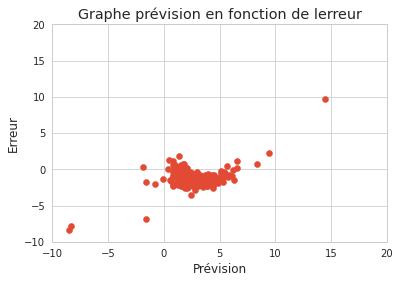

In [12]:
erreur=Y_pred-Y_test['TotalGHGEmissions'] #erreur de prédiction 
plt.figure()
plt.scatter(Y_pred,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.xlim(-10,20)
plt.ylim(-10,20)
plt.title('Graphe prévision en fonction de lerreur')
plt.show()
#todo:graph plus grands

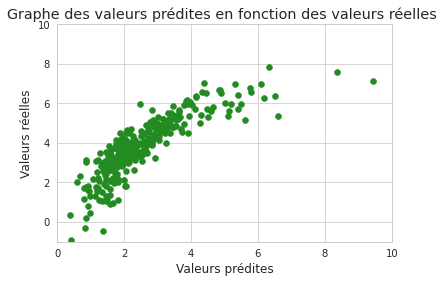

In [13]:
plt.figure()
plt.scatter(Y_pred,Y_test['TotalGHGEmissions'],c='forestgreen')

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Graphe des valeurs prédites en fonction des valeurs réelles ')
plt.xlim(0,10)
plt.ylim(-1,10)
plt.show()

<a name="hp"></a>
## **Regression linéaire sur l'utilisation d'énergie**

In [14]:
lm.fit(X_train,Y_train['SiteEnergyUse(kBtu)'])

LinearRegression()

In [15]:
Y_pred_bis = lm.predict(X_test)
MSE_lin_bis=mean_squared_error(Y_test['SiteEnergyUse(kBtu)'],Y_pred_bis)
print('Notre MSE est égal à %0.2f' %MSE_lin_bis)
#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)
MAPE_bis= mean_absolute_percentage_error(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis) * 100
print('MAPE :' ,round(MAPE_bis,2), '%')
# Evaluation du training set

lineartime= timeit.default_timer()-start_time
print('Voici le temps de calcul en ms',round(lineartime,2))   
rmse_linear_bis = (np.sqrt(mean_squared_error(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis)))
r2_linear_bis= r2_score(Y_test['SiteEnergyUse(kBtu)'], Y_pred_bis)
#print('La performance du modèle sur la base dapprentissage')
#print('--------------------------------------')
print('RMSE est {}'.format(rmse_linear_bis))
print('le score R2 coeff de determination est de %0.2f' %(r2_linear_bis))
#print('\n')
print('MSE Train Score :', round(lm.score(X_train,Y_train['SiteEnergyUse(kBtu)'])),2)
print('MSE Test Score :', round(lm.score(X_test,Y_test['SiteEnergyUse(kBtu)'])),2)

Notre MSE est égal à 2.31
MAPE : 8.01 %
Voici le temps de calcul en ms 3.0
RMSE est 1.5182847218661757
le score R2 coeff de determination est de -0.28
MSE Train Score : 1 2
MSE Test Score : 0 2


In [16]:
new_row_en = {'MSE': MSE_lin_bis, 'R2': r2_linear_bis, 'time': lineartime}
MetEn = MetEn.append(new_row_en, ignore_index=True)

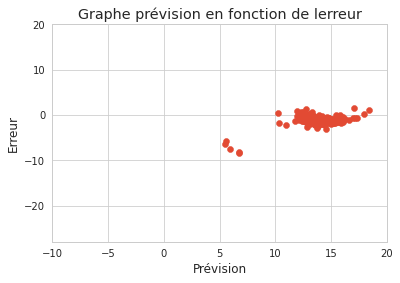

In [17]:
erreur=Y_pred_bis-Y_test['SiteEnergyUse(kBtu)'] #erreur de prédiction 
plt.figure()
plt.scatter(Y_pred_bis,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.xlim(-10,20)
plt.ylim(-28,20)
plt.title('Graphe prévision en fonction de lerreur')
plt.show()


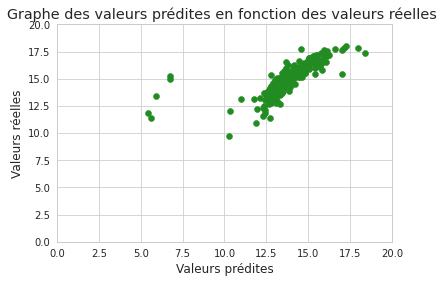

In [18]:
plt.figure()
plt.scatter(Y_pred_bis,Y_test['SiteEnergyUse(kBtu)'],c='forestgreen')

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Graphe des valeurs prédites en fonction des valeurs réelles ')
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

Conclusion : notre modèle de régression linéaire n'est pas efficace pour nos prédictions.

In [19]:
MetCO2.to_csv("/content/drive/MyDrive/MetC02_Reglin.csv", sep='\t')
MetEn.to_csv("/content/drive/MyDrive/MetEn_Reglin.csv", sep='\t')

In [20]:
MetCO2

,Unnamed: 0,MSE,R2,time
0,0.0,2.489447,-0.010528,0.155371
1,NaN,4.223780,-0.714537,0.618909
